# Exploring Dandiset 001354: Hippocampal Neuronal Responses to Programmable Antigen-Gated G-protein-coupled Engineered Receptor Activation

> **NOTE**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results, and validate findings with your own analysis as appropriate.

## Overview

This notebook explores Dandiset 001354, which contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGER). The recorded neurons were transfected with AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

The dataset is accessible at: [Dandiset 001354 version 0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

In this notebook, we will:
1. Load the Dandiset using the DANDI API
2. Explore the metadata and structure of the NWB files
3. Analyze the intracellular electrophysiological recordings
4. Visualize neuronal responses to stimuli
5. Examine patterns of neural adaptation across repeated stimulations

## Required Packages

The following packages are required to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import remfile
import pynwb
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import seaborn as sns

# Set seaborn style for plots
sns.set_theme()

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036

First 5 assets:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97)


## Data Structure

This Dandiset contains multiple NWB files, each containing intracellular electrophysiology recordings from different cells and slices. The data was collected from mouse hippocampal CA1 neurons, with a focus on studying responses to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGER).

The data is organized by subject, session, slice, and cell, following the pattern:
```
sub-<subject_id>/sub-<subject_id>_ses-<session_id>_slice-<slice_id>_cell-<cell_id>_icephys.nwb
```

Let's select and examine one of the NWB files in detail.

In [3]:
# Select one of the NWB files from the assets
# Here we're using the first file from the list
asset = next(dandiset.get_assets())
asset_id = asset.identifier
asset_path = asset.path

print(f"Selected asset: {asset_path}")
print(f"Asset ID: {asset_id}")

# Construct the URL to download the file
asset_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Asset URL: {asset_url}")

# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Selected asset: sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
Asset ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba
Asset URL: https://api.dandiarchive.org/api/assets/b2860f39-ba08-4b5f-8e12-c4b51ad6ccba/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring the NWB File Metadata

Let's first examine the metadata in the NWB file to understand what information is available about the experiment, subject, and recording setup.

In [4]:
# Print basic metadata from the NWB file
print(f"NWB File ID: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"File Created: {nwb.file_create_date[0]}")

# Subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Date of Birth: {nwb.subject.date_of_birth}")

# Lab metadata (Dandi Icephys Metadata)
print("\nLab Metadata:")
dandi_metadata = nwb.lab_meta_data['DandiIcephysMetadata']
print(f"Cell ID: {dandi_metadata.cell_id}")
print(f"Slice ID: {dandi_metadata.slice_id}")
print(f"Targeted Layer: {dandi_metadata.targeted_layer}")

NWB File ID: pk2024_07_17_0009
Session Description: Intracellular electrophysiology experiment.
Session Start Time: 2024-07-17 18:07:19-07:00
File Created: 2025-03-07 17:42:47.161274-08:00

Subject Information:
Subject ID: PK-109
Species: Mus musculus
Sex: F
Date of Birth: 2024-04-07 00:00:00-07:00

Lab Metadata:
Cell ID: 2024_07_17_0009
Slice ID: 2024_07_17_0009
Targeted Layer: CA1


## NWB File Structure

The NWB file is organized in a hierarchical structure. Let's examine the key components:

- **Acquisition**: Contains the recorded response data (CurrentClampSeries)
- **Stimulus**: Contains the stimulus data (CurrentClampStimulusSeries)
- **Electrodes**: Contains information about the recording electrodes
- **Lab Metadata**: Contains additional lab-specific metadata

The structure of the NWB file can be summarized as follows:

```
nwb
├── acquisition
│   ├── current_clamp-response-01-ch-0
│   ├── current_clamp-response-01-ch-1
│   ├── current_clamp-response-02-ch-0
│   └── ...
├── stimulus
│   ├── stimulus-01-ch-0
│   ├── stimulus-01-ch-1
│   ├── stimulus-02-ch-0
│   └── ...
├── icephys_electrodes
│   ├── electrode-0
│   └── electrode-1
├── devices
│   └── DeviceIcephys
├── lab_meta_data
│   └── DandiIcephysMetadata
└── ...
```

In [5]:
# Print information about the data structure
print("NWB File Structure:")

# List acquisitions
acquisition_keys = list(nwb.acquisition.keys())
print(f"\nAcquisition data: {len(acquisition_keys)} items")
print(f"First 5 acquisition keys: {acquisition_keys[:5]}")

# List stimuli
stimulus_keys = list(nwb.stimulus.keys())
print(f"\nStimulus data: {len(stimulus_keys)} items")
print(f"First 5 stimulus keys: {stimulus_keys[:5]}")

# List electrodes
print("\nIcephys Electrodes:")
for key, electrode in nwb.icephys_electrodes.items():
    print(f"- {key}: {electrode.description}")

# Look at the sequential recordings table
if hasattr(nwb, 'icephys_sequential_recordings'):
    seq_df = nwb.icephys_sequential_recordings.to_dataframe()
    print("\nSequential Recordings Table:")
    print(seq_df)
    
    if 'stimulus_type' in seq_df.columns:
        print(f"\nStimulus type: {seq_df['stimulus_type'].values}")

NWB File Structure:

Acquisition data: 624 items
First 5 acquisition keys: ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0']

Stimulus data: 624 items
First 5 stimulus keys: ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0']

Icephys Electrodes:
- electrode-0: no description
- electrode-1: no description



Sequential Recordings Table:
                              simultaneous_recordings stimulus_type
id                                                                 
0                                               re...          ramp

Stimulus type: ['ramp']


## Exploring Current Clamp Recordings

Let's look at the properties of one of the current clamp recordings to understand the data format and parameters.

In [6]:
# Examine a single current clamp response recording
response_key = acquisition_keys[0]  # Get the first recording
response = nwb.acquisition[response_key]

print(f"Examining: {response_key}")
print(f"Type: {type(response).__name__}")
print(f"Starting time: {response.starting_time} {response.starting_time_unit}")
print(f"Sampling rate: {response.rate} Hz")
print(f"Unit: {response.unit}")
print(f"Data shape: {response.data.shape}")
print(f"Conversion factor: {response.conversion}")
print(f"Description: {response.description}")

# Examine the corresponding stimulus
stimulus_key = stimulus_keys[0]  # Get the first stimulus
stimulus = nwb.stimulus[stimulus_key]

print(f"\nExamining: {stimulus_key}")
print(f"Type: {type(stimulus).__name__}")
print(f"Unit: {stimulus.unit}")
print(f"Data shape: {stimulus.data.shape}")
print(f"Description: {stimulus.description}")

Examining: current_clamp-response-01-ch-0
Type: CurrentClampSeries
Starting time: 0.0 seconds
Sampling rate: 20000.0 Hz
Unit: volts
Data shape: (100000,)
Conversion factor: 3.051757880712104e-05
Description: Response to: ramp

Examining: stimulus-01-ch-0
Type: CurrentClampStimulusSeries
Unit: amperes
Data shape: (100000,)
Description: Stim type: ramp


## Visualizing Neuronal Responses

Now let's visualize some of the current clamp recordings to understand the neuronal responses. We'll plot both the stimulus and response data. Each recording consists of:

1. A protocol of current injections to the neuron
2. The recorded membrane voltage response

Let's examine a single recording in detail:

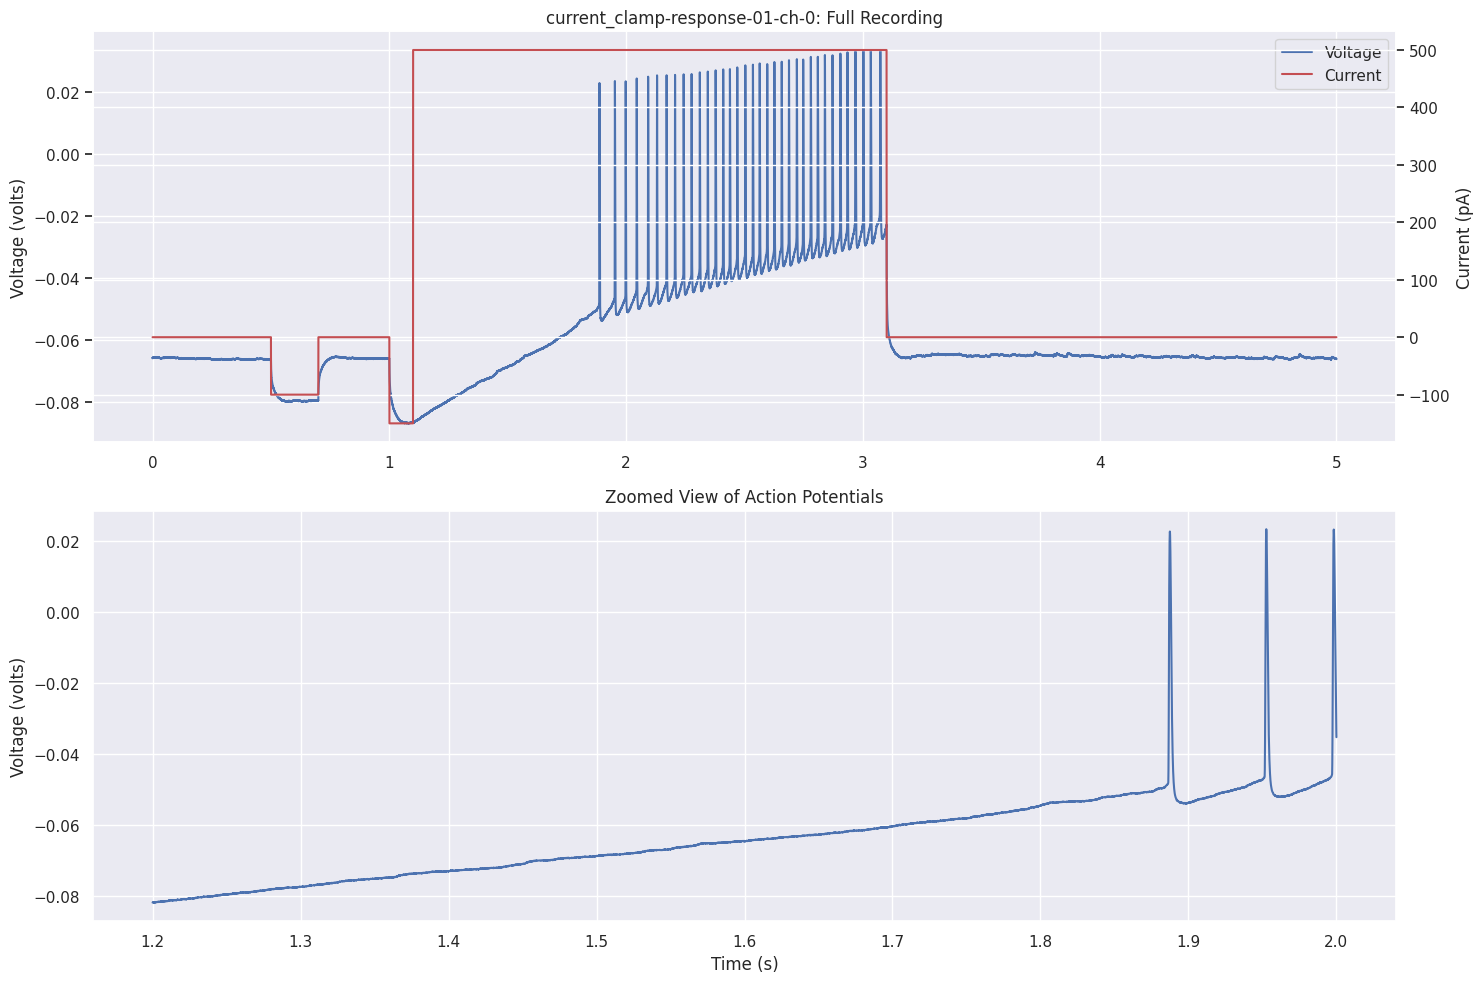

In [7]:
# Let's visualize one of the recordings in detail
response_key = "current_clamp-response-01-ch-0"
stimulus_key = "stimulus-01-ch-0"

response = nwb.acquisition[response_key]
stimulus = nwb.stimulus[stimulus_key]

# Get the data
response_data = response.data[:] * response.conversion
stimulus_data = stimulus.data[:] * stimulus.conversion * 1e12  # Convert to pA
time_array = np.arange(len(response_data)) / response.rate

# Plot the full recording
plt.figure(figsize=(15, 10))

# Create subplot for response and stimulus
plt.subplot(2, 1, 1)
ax1 = plt.gca()
line1 = ax1.plot(time_array, response_data, 'b-', label='Voltage')
ax1.set_ylabel(f"Voltage ({response.unit})")

ax2 = ax1.twinx()
line2 = ax2.plot(time_array, stimulus_data, 'r-', label='Current')
ax2.set_ylabel("Current (pA)")

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title(f"{response_key}: Full Recording")

# Plot a zoomed-in portion to see action potentials
t_start = 1.2
t_end = 2.0
mask = (time_array >= t_start) & (time_array <= t_end)

plt.subplot(2, 1, 2)
ax1 = plt.gca()
ax1.plot(time_array[mask], response_data[mask], 'b-', label='Voltage')
ax1.set_ylabel(f"Voltage ({response.unit})")
ax1.set_xlabel("Time (s)")
plt.title("Zoomed View of Action Potentials")

plt.tight_layout()

### Understanding the Recording

The plot above shows a typical current clamp recording from a CA1 hippocampal neuron. Let's analyze what we're seeing:

1. **Stimulus Protocol**: 
   - Two brief negative current pulses (approximately -100 pA) at around 0.5s and 1.0s
   - A sustained positive current injection (approximately 500 pA) from ~1.2s to ~3.0s

2. **Neuronal Response**:
   - Initial membrane potential around -65 mV (baseline)
   - Hyperpolarization during negative current injections
   - Action potential firing in response to the positive current injection
   - Gradual adaptation with decreased firing frequency over time
   - Return to baseline after stimulus ends

3. **Action Potentials**:
   - Initial high-frequency firing that gradually slows down (spike frequency adaptation)
   - Decreasing amplitude of action potentials over time

This protocol allows researchers to study both the hyperpolarizing and depolarizing responses of the neuron, as well as its firing properties and adaptation mechanisms.

## Comparing Multiple Recordings

Now let's compare multiple recordings to see if there are patterns or differences across the dataset. We'll look at several recordings and plot their responses.

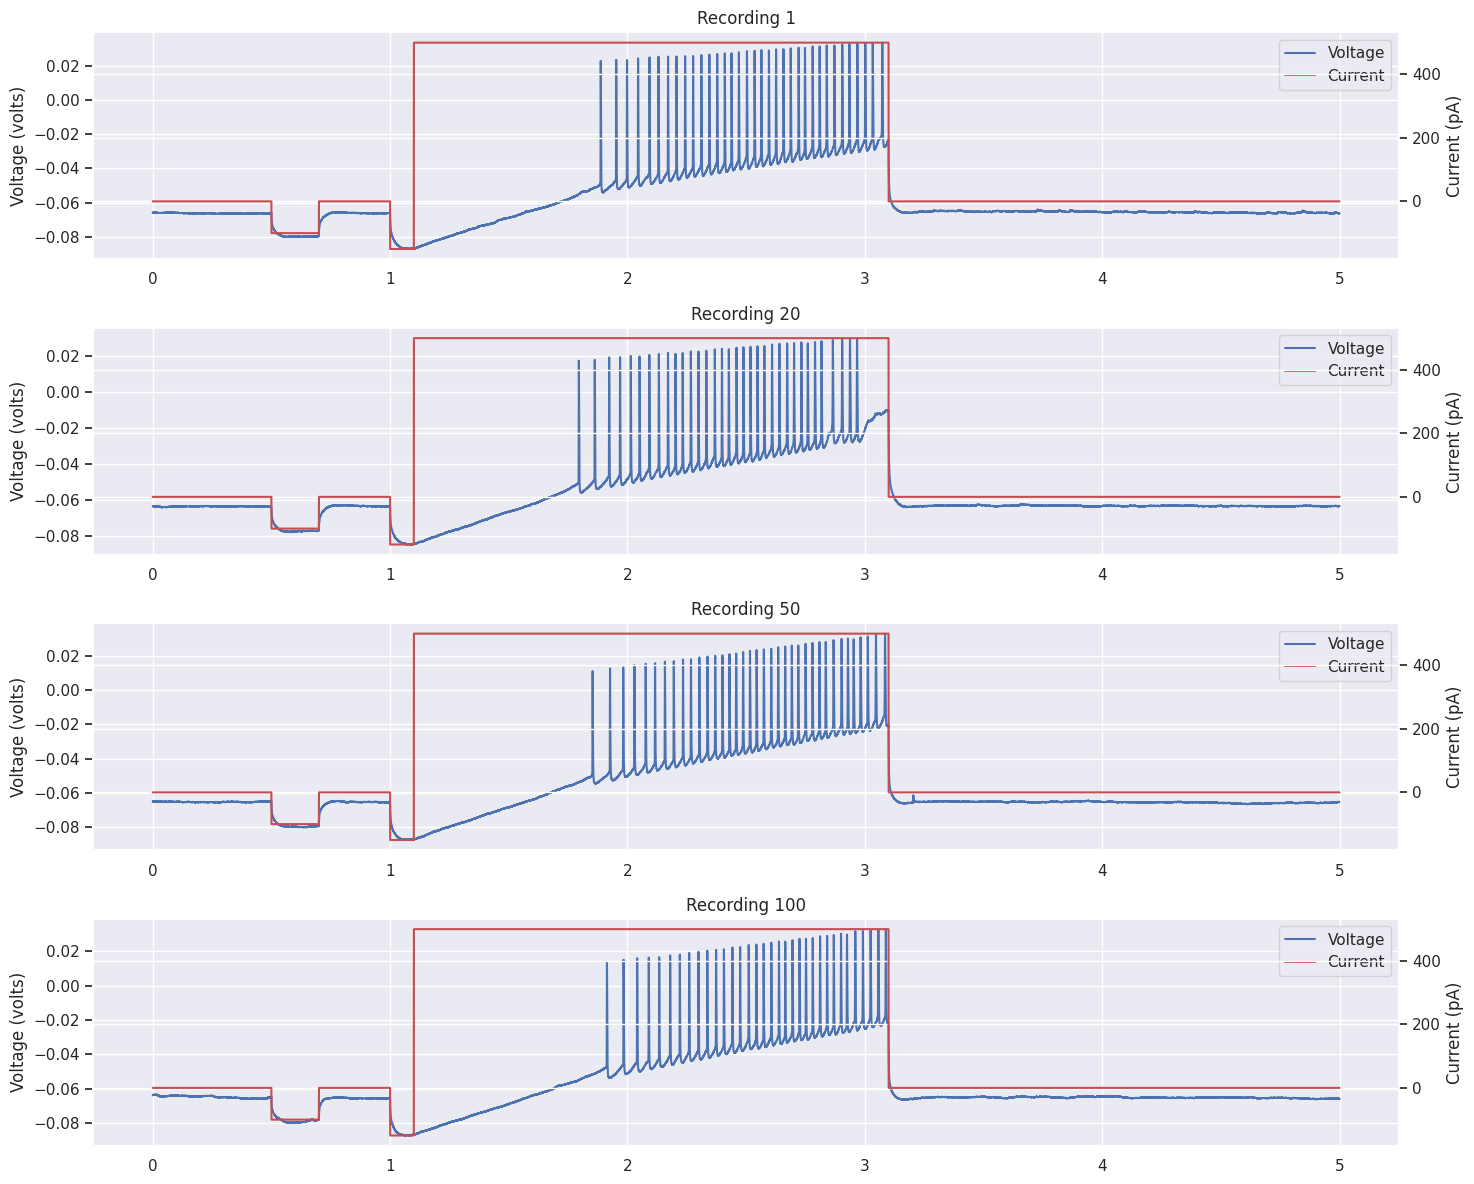

In [8]:
# Let's compare several recordings
recording_indices = [1, 20, 50, 100]
plt.figure(figsize=(15, 12))

for i, idx in enumerate(recording_indices):
    response_key = f"current_clamp-response-{idx:02d}-ch-0"
    stimulus_key = f"stimulus-{idx:02d}-ch-0"
    
    try:
        response = nwb.acquisition[response_key]
        stimulus = nwb.stimulus[stimulus_key]
    except KeyError:
        print(f"Skipping index {idx}, key not found")
        continue
    
    # Get the full data
    response_data = response.data[:] * response.conversion
    stimulus_data = stimulus.data[:] * stimulus.conversion * 1e12  # Convert to pA
    time_array = np.arange(len(response_data)) / response.rate
    
    # Plot response and stimulus together
    plt.subplot(len(recording_indices), 1, i+1)
    
    ax1 = plt.gca()
    line1 = ax1.plot(time_array, response_data, 'b-', label='Voltage')
    ax1.set_ylabel(f"Voltage ({response.unit})")
    
    ax2 = ax1.twinx()
    line2 = ax2.plot(time_array, stimulus_data, 'r-', label='Current')
    ax2.set_ylabel("Current (pA)")
    
    # Add legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')
    
    plt.title(f"Recording {idx}")
    plt.xlabel("Time (s)")

plt.tight_layout()

### Observations from Multiple Recordings

Comparing multiple recordings reveals some key insights:

1. **Stimulus Consistency**: The stimulus protocol is remarkably consistent across recordings, with identical timings and amplitudes.

2. **Response Adaptation**: There's a clear trend of neuronal adaptation across recordings:
   - Earlier recordings (e.g., recording #1) show more vigorous action potential firing
   - Later recordings (e.g., recording #100) show fewer action potentials
   - The time to first spike increases in later recordings

3. **Basic Response Structure**: All recordings show similar basic structure:
   - Hyperpolarization during negative current steps
   - Depolarization and action potential firing during positive current injection
   - Return to baseline after stimulus ends

These patterns suggest that while the neurons maintain their basic electrophysiological properties throughout the recordings, there is progressive adaptation or possible changes in excitability over time.

## Examining Changes in Neuronal Response Over Time

Let's look more closely at how neuronal responses change between early and late recordings. This can help us understand potential adaptation mechanisms or changes in neuronal excitability.

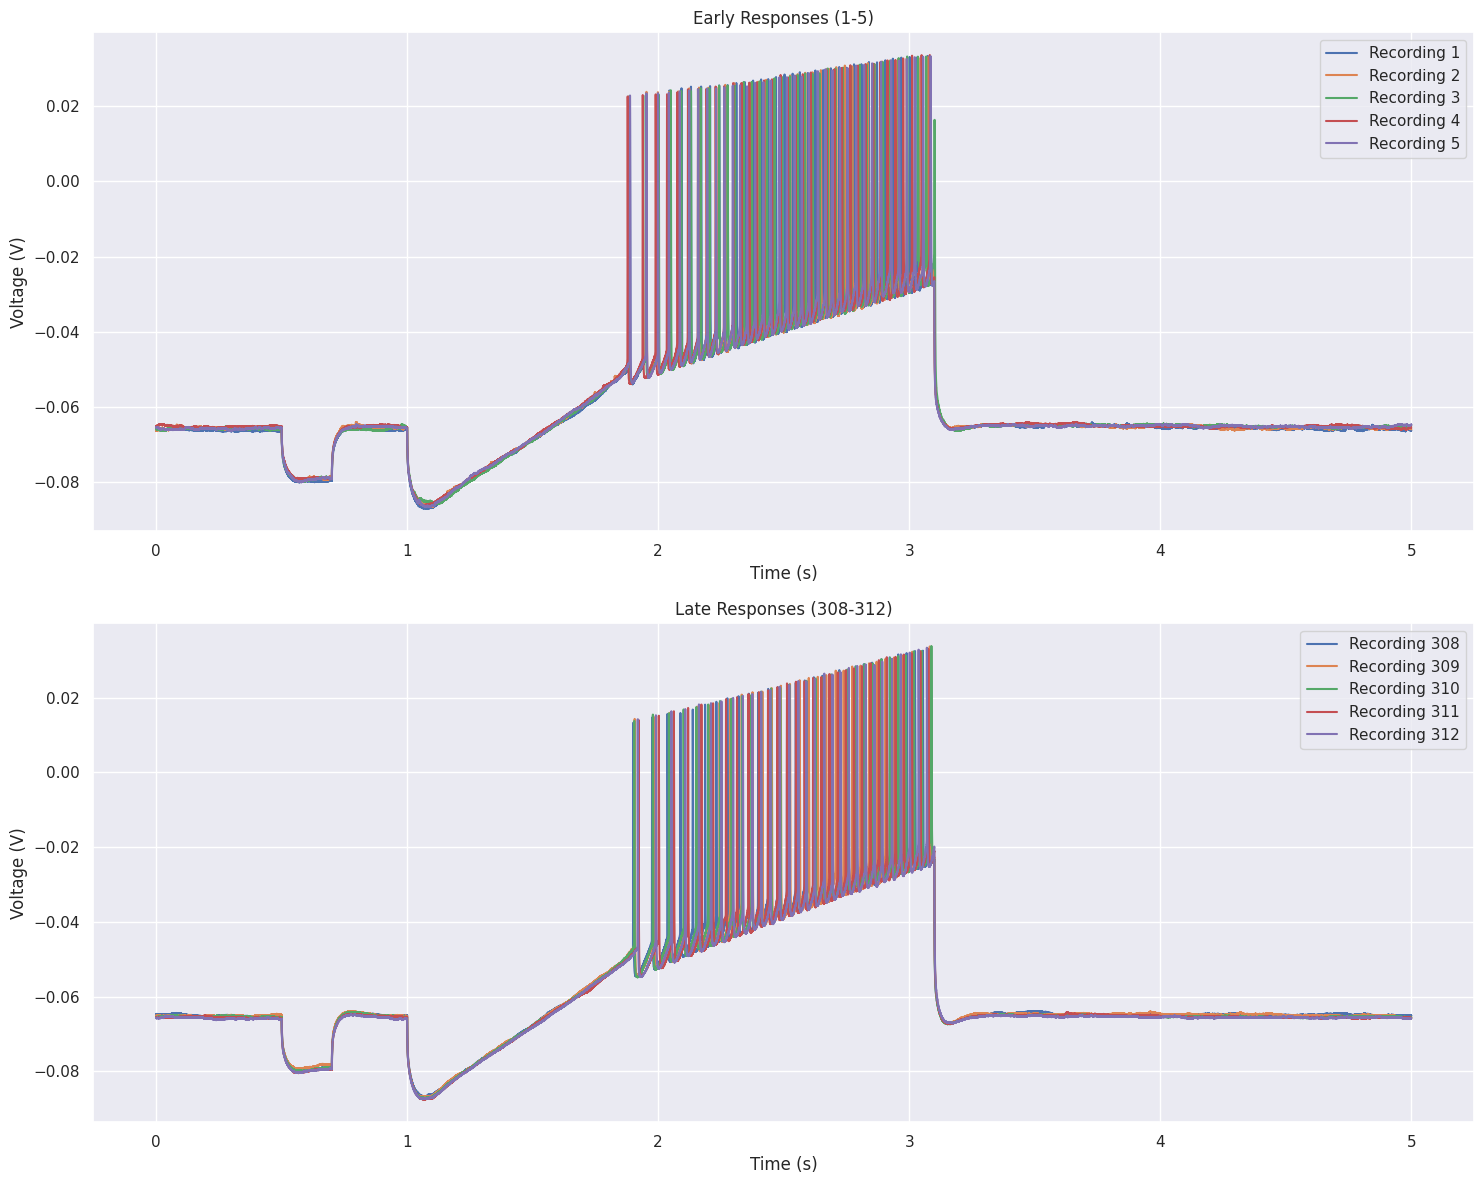

In [9]:
# Compare early and late responses
plt.figure(figsize=(15, 12))

# First, early responses
plt.subplot(2, 1, 1)
for idx in range(1, 6):
    response_key = f"current_clamp-response-{idx:02d}-ch-0"
    
    try:
        response = nwb.acquisition[response_key]
    except KeyError:
        print(f"Skipping response {idx}, key not found")
        continue
        
    response_data = response.data[:] * response.conversion
    time_array = np.arange(len(response_data)) / response.rate
    
    plt.plot(time_array, response_data, label=f"Recording {idx}")

plt.title("Early Responses (1-5)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()

# Then, later responses
plt.subplot(2, 1, 2)
# Find available recordings (this approach is safer than hard-coding indices)
acquisition_keys = list(nwb.acquisition.keys())
response_keys = [k for k in acquisition_keys if 'current_clamp-response' in k and '-ch-0' in k]
# Extract indices
indices = []
for key in response_keys:
    parts = key.split("-")
    if len(parts) > 2 and parts[2].isdigit():
        indices.append(int(parts[2]))

if indices:
    max_idx = max(indices)
    # Use the 5 highest indices if possible
    last_indices = sorted(indices)[-5:]
    
    for idx in last_indices:
        response_key = f"current_clamp-response-{idx:02d}-ch-0"
        
        try:
            response = nwb.acquisition[response_key]
        except KeyError:
            print(f"Skipping response {idx}, key not found")
            continue
            
        response_data = response.data[:] * response.conversion
        time_array = np.arange(len(response_data)) / response.rate
        
        plt.plot(time_array, response_data, label=f"Recording {idx}")

    plt.title(f"Late Responses ({last_indices[0]}-{last_indices[-1]})")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.legend()

plt.tight_layout()

### Observations on Neuronal Adaptation

The comparison of early versus late recordings reveals several important changes in neuronal response properties:

1. **Baseline Membrane Potential**: The resting membrane potential appears to become more depolarized (less negative) in later recordings.

2. **Response Amplitude**:
   - Hyperpolarization responses are reduced in amplitude in later recordings
   - The amplitude of action potentials is smaller in later recordings

3. **Action Potential Pattern**:
   - Early recordings show clear, robust action potentials
   - Late recordings show fewer action potentials and altered firing patterns

These observations suggest significant adaptation in these neurons over the course of multiple recordings. This adaptation could be due to:

- Inactivation of voltage-gated ion channels
- Changes in intracellular calcium concentration
- Alterations in receptor sensitivity or expression
- Metabolic changes within the neuron

Such adaptation is a characteristic feature of many neurons and may have implications for the interpretation of PAGER-mediated effects on neuronal excitability.

## Exploring the Stimulus Properties

Let's examine the characteristics of the stimuli in more detail to understand the experimental protocol.

Stimulus Analysis:

Stimulus 1:
  Min: -150.00 pA
  Max: 500.00 pA
  Mean: 193.00 pA
  Description: Stim type: ramp

Stimulus 50:
  Min: -150.00 pA
  Max: 500.00 pA
  Mean: 193.00 pA
  Description: Stim type: ramp

Stimulus 100:
  Min: -150.00 pA
  Max: 500.00 pA
  Mean: 193.00 pA
  Description: Stim type: ramp


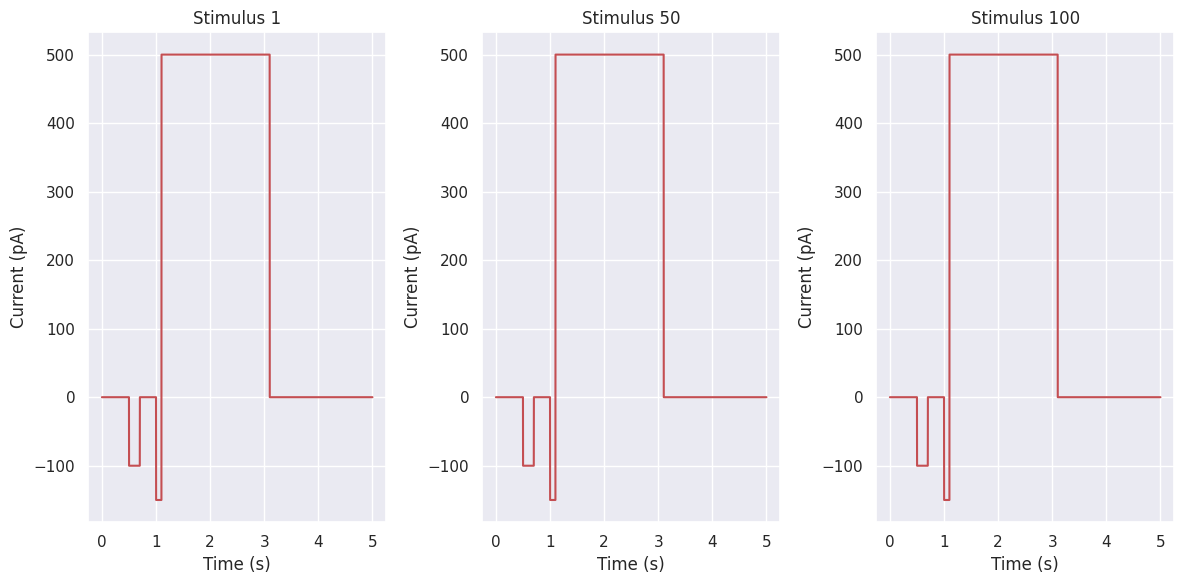

In [10]:
# Let's compare stimulus shapes across recordings
plt.figure(figsize=(12, 6))

# Look at a few different recordings
indices_to_check = [1, 50, 100]
valid_indices = []

for i, idx in enumerate(indices_to_check):
    stimulus_key = f"stimulus-{idx:02d}-ch-0"
    
    try:
        stimulus = nwb.stimulus[stimulus_key]
        valid_indices.append(idx)
    except KeyError:
        print(f"Skipping stimulus {idx}, key not found")
        continue

for i, idx in enumerate(valid_indices):
    stimulus_key = f"stimulus-{idx:02d}-ch-0"
    stimulus = nwb.stimulus[stimulus_key]
    stimulus_data = stimulus.data[:] * stimulus.conversion * 1e12  # Convert to pA
    time_array = np.arange(len(stimulus_data)) / stimulus.rate
    
    plt.subplot(1, len(valid_indices), i+1)
    plt.plot(time_array, stimulus_data, 'r-')
    plt.title(f"Stimulus {idx}")
    plt.xlabel("Time (s)")
    plt.ylabel("Current (pA)")

plt.tight_layout()

# Print summary statistics for the stimuli
print("Stimulus Analysis:")
for idx in valid_indices:
    stimulus_key = f"stimulus-{idx:02d}-ch-0"
    stimulus = nwb.stimulus[stimulus_key]
    stimulus_data = stimulus.data[:] * stimulus.conversion * 1e12  # Convert to pA
    
    min_val = np.min(stimulus_data)
    max_val = np.max(stimulus_data)
    mean_val = np.mean(stimulus_data)
    
    print(f"\nStimulus {idx}:")
    print(f"  Min: {min_val:.2f} pA")
    print(f"  Max: {max_val:.2f} pA")
    print(f"  Mean: {mean_val:.2f} pA")
    print(f"  Description: {stimulus.description}")

### Stimulus Protocol Characteristics
The stimulus protocol used in these recordings follows a consistent pattern, described as a "ramp" type in the metadata. However, when examining the actual stimulus waveform, we can see that it consists of:

1. Two brief negative current steps (approximately -150 pA)
2. A sustained positive current injection (approximately 500 pA) for about 1.5-2 seconds

The consistency of the stimulus across recordings indicates a well-controlled experimental protocol designed to elicit reproducible neuronal responses. The initial negative current steps may serve to:

- Test the input resistance of the neuron
- Provide a consistent starting condition before the main stimulus
- Identify possible hyperpolarization-activated currents

The main positive current injection is designed to drive the neuron above threshold and elicit action potential firing, allowing the researchers to study:

- Firing threshold
- Action potential waveform
- Spike frequency adaptation
- Recovery from sustained activation

The descriptions indicate these are "ramp" stimuli, though they appear more step-like in the visualizations. This may indicate that the actual protocol used a ramping onset/offset that's not clearly visible at this temporal resolution.

## Viewing a Single NWB File on Neurosift

You can explore the NWB file we've been examining in more detail using Neurosift, an online viewer for neuroscience data. Click the link below to view the file:

In [11]:
# Construct the Neurosift URL for the NWB file
neurosift_url = f"https://neurosift.app/nwb?url={asset_url}&dandisetId=001354&dandisetVersion=0.250312.0036"
print(f"View this NWB file on Neurosift: {neurosift_url}")

View this NWB file on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/b2860f39-ba08-4b5f-8e12-c4b51ad6ccba/download/&dandisetId=001354&dandisetVersion=0.250312.0036


## Summary and Conclusions

In this notebook, we explored Dandiset 001354, which contains intracellular recordings from mouse hippocampal CA1 neurons expressing programmable antigen-gated G-protein-coupled engineered receptors (PAGER).

### Key Findings:

1. **Data Structure**: The dataset contains numerous NWB files organized by subject, session, slice, and cell, each containing extensive intracellular electrophysiology recordings.

2. **Recording Protocol**: Each recording consists of a consistent stimulus protocol with negative current steps followed by a sustained positive current injection, designed to probe both hyperpolarizing and depolarizing responses.

3. **Neuronal Response Properties**:
   - The CA1 neurons show typical electrophysiological properties, including:
   - Hyperpolarization in response to negative current
   - Action potential firing in response to positive current
   - Spike frequency adaptation during sustained stimulation

4. **Evidence of Adaptation**: Comparing early and late recordings reveals significant changes in neuronal properties over time, with reduced response amplitudes and altered firing patterns in later recordings.

### Future Directions:

This dataset offers rich opportunities for further analysis, including:

1. **Quantitative Analysis**: Measuring specific properties such as:
   - Input resistance and membrane time constant
   - Action potential threshold, amplitude, and width
   - Adaptation time constants
   - Changes in these properties across experimental conditions

2. **Comparative Analysis**: Comparing responses:
   - Between different neurons/slices/subjects
   - Between conditions (DCZ vs. DCZ+mCherry)
   - Between different PAGER constructs

3. **Modeling**: Developing computational models of these neurons to understand:
   - Mechanisms of PAGER activation
   - Relationship between receptor activation and neuronal excitability
   - Potential applications for controlling neuronal activity

This dataset provides valuable insights into how programmable antigen-gated receptors can modulate neuronal activity, with potential applications in both basic neuroscience research and therapeutic development.

## Acknowledgments

The authors of the dataset acknowledge support from:

- St Jude Children's Research Hospital Collaborative Research Consortium on GPCRs
- Chan Zuckerberg Biohub–San Francisco
- Phil and Penny Knight Initiative for Brain Resilience (KIG-104)
- Stanford Cancer Institute
- Wu Tsai Neurosciences Institute of Stanford University
- NIH (grants MH135934, F32CA257159, NS121106)
- Life Sciences Research Foundation Fellowship
- JSPS Overseas Research Fellowship